<a href="https://colab.research.google.com/github/Lis077a/di-project/blob/main/LOL_win_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto Data intensive: Lisotta Marco

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Marco Lisotta  
Mat: 880175  
marco.lisotta@studio.unibo.it

## Descrizione del problema

Il dataset preso in esame contiene statistiche sul videogioco **League of Legends**, classificato come MOBA (multiplayer online battle arena), dove due squadre (Blue e Red) si affrontano. Il nostro obiettivo sarà quello di predire la squadra vincitrice basandoci sui primi 10 minuti di partita.

- Importiamo le librerie necessarie

In [1]:
# setup e test librerie
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Utilizziamo il database fornito su Kaggle:   
https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

In [2]:
original_dataset = pd.read_csv("/content/high_diamond_ranked_10min.csv")

In [3]:
original_dataset.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
original_dataset.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

Facciamo una breve descrizione per ogni **feature** che abbiamo a disposizione:

1. gameId = Id del game
2. blueWins = Vittoria blue (1) o vittoria red (0)
3. (blue/red)WardsPlaced = Numero di lumi posizionati (rivelano un area di gioco)
4. (blue/red)WardsDestryed = Numero di lumi distrutti
5. (blue/red)FirstBlood = Prima uccisione della partita (1 | 0)
6. (blue/red)Kills = Somma uccisioni di squadra
7. (blue/red)Death = Somma morti di squadra
8. (blue/red)Assist = Somma assist di squadra
9. (blue/red)EliteMonster = Numero di mostri uccisi (Dragons e Heralds)
10. (blue/red)Dragons = Quantita di mostri uccisi di questa tipologia
11. (blue/red)Herald = Quantita di mostri uccisi di questa tipologia
12. (blue/red)TowersDestroyed = Numero di torri distrutte
13. (blue/red)TotalGold = Somma del gold dei giocatori di una squadra
14. (blue/red)AvgLevel = Media dei livelli tra i giocatori di una squadra
15. (blue/red)TotalExperience = Somma esperienza tra i giocatori di una squadra
16. (blue/red)TotalMinionsKilled = Totale di NPC uccisi da una squadra
17. (blue/red)TotalJungMinionsKilled = Totale di NPC neutri uccisi da una squadra
18. (blue/red)GoldDiff = Differenza di gold con altra squadra
19. (blue/red)ExperienceDiff = Differenza in esperienza con altra squadra
20. (blue/red)CSPerMin = Media NPC uccisi al minuto
21. (blue/red)GoldPerMin = Media gold accumulato per minuto

La variabile target è `blueWins` e come possiamo intuire dalla descrizione sarà binaria `0` se la squadra blue perdere, `1` se la squadra blue vince. 

Le features che abbiamo in esame, a primo impatto, sono tutte di tipo **continuo**, eccetto l'unica variabile di tipo **binario** `FirstBlood`.

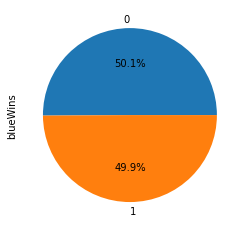

In [5]:
original_dataset["blueWins"].value_counts().plot.pie(autopct='%1.1f%%')

Osserviamo dal grafico a torta che la variabile target `bluWins` risulta essere bilanciata, come ci aspettiamo sia su un videogioco competitivo.

In [6]:
original_dataset.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

- Non sono presenti valori nulli all'interno del database

In [7]:
dataset = original_dataset

- Possiamo cancellare immediatamente la colonna `gameId` in quanto irrilevante ai fini del problema.

In [8]:
dataset = dataset.drop("gameId", axis=1)

## Analisi esplorativa dei dati e modellazione dati

In questa sezione andiamo ad esplorare tutte le feature ed i dati a nostra disposizione ed effettueremo le modifiche che riteniamo necessarie.

- Possiamo facilmente intuire e dimostrare come `blueFirstBlood` e `redFirstBlood` siano una complementare all'altra, in quanto può esistere solamente uno di questi per partita.

In [9]:
dataset.shape[0] == (dataset["blueFirstBlood"] + dataset["redFirstBlood"]).sum()

True

Possiamo eliminare la colonna `redFirstBlood`.

In [10]:
dataset = dataset.drop("redFirstBlood", axis=1)

- Analizziamo `Kills` e `Death` per ciascuna squadra e notiamo come siano feature esattamente una opposta all'altra

In [11]:
(dataset["blueKills"] == dataset["redDeaths"]).unique(), \
(dataset["redKills"] == dataset["blueDeaths"]).unique()

(array([ True]), array([ True]))

Cancelliamo rispettivamente le colonne `redKills` e `redDeaths`

In [12]:
dataset = dataset.drop(["redKills", "redDeaths"], axis=1)

- Cancelliamo anche la feature `EliteMonsters` in quanto equivale alla sommatoria di Dagons e Heralds, come specificato nella descrizione delle feature.
- Dimostriamo che il numero equivalga e cancelliamo la feature

In [13]:
(dataset["blueEliteMonsters"] == dataset["blueDragons"] + dataset["blueHeralds"]).unique(), \
(dataset["redEliteMonsters"] == dataset["redDragons"] + dataset["redHeralds"]).unique()

(array([ True]), array([ True]))

In [14]:
dataset = dataset.drop(["blueEliteMonsters", "redEliteMonsters"], axis=1)

Andiamo ad analizzare il numero di valori unici delle variabili

In [15]:
dataset.nunique()

blueWins                           2
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueGoldDiff                    6047
blueExperienceDiff              5356
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redAssists                        28
redDragons                         2
redHeralds                         2
redTowersDestroyed                 3
redTotalGold                    4732
redAvgLevel                       18
r

Notiamo come ci siano altre tipi di variabili di tipo **binario**. Queste sono quelle che involvono `Dragons` e `Heralds`.    
Le variabili sono di tipo binario in quanto nei primi 10 minuti di partita sarà possibile per le squadre aggiudicarsi solo uno di questi mostri.

- Non cancelliamo una dele feature in quanto esiste sempre la possibilità che nessuna delle due squadre se lo aggiudichi e venga ignorato

Ora che abbiamo eliminato le variabili con una relazione facilmente intuibile(per chi conosce il videogioco), andiamo ad analizzare le correlazioni che hanno le feature con la nostra variabile da predire.

In [16]:
dataset.corr()["blueWins"].abs().sort_values(ascending=False)

blueWins                        1.000000
redGoldDiff                     0.511119
blueGoldDiff                    0.511119
redExperienceDiff               0.489558
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
redTotalGold                    0.411396
redGoldPerMin                   0.411396
blueTotalExperience             0.396141
redTotalExperience              0.387588
blueAvgLevel                    0.357820
redAvgLevel                     0.352127
blueDeaths                      0.339297
blueKills                       0.337358
blueAssists                     0.276685
redAssists                      0.271047
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueDragons                     0.213768
redTotalMinionsKilled           0.212171
redCSPerMin                     0.212171
redDragons                      0.209516
blueFirstBlood                  0.201769
blueTotalJungleM

- Tutte le colonne di tipo diff sono ridondanti, ne manteniamo soltanto una
- Le colonne `PerMin` hanno la stessa influenza del totale della specifica feature (Gold, CS(Minion Killed))

In [17]:
drop = [
    "redGoldDiff",
    "redExperienceDiff",
    "blueGoldPerMin",
    "redGoldPerMin",
    "blueCSPerMin",
    "redCSPerMin",
    "blueGoldDiff",
    "blueExperienceDiff",
]
dataset = dataset.drop(drop, axis=1)

- Cancelliamo tutte le colonne `Diff` per facilitare il prossimo lavoro di **Features engineering** che andremo ad eseguire e renderlo più esplicativo.

Visto la natura competitiva del videogioco, e considerando che la nostra variabile da predire è la vittoria o sconfitta della squadra blu, proviamo a introdurre nuove feature derivate dalle precedenti.    
Osservando le correlazioni possiamo notare come le feature più incisive siano quelle che mettono in evidenza la differenza tra le due squadre. Quindi proviamo ad estrarle e vedere se sono più rilevanti delle precedenti.

In [18]:
# Credit: https://www.kaggle.com/code/pratikgarai/lol-win-prediction
diffFeatures = [
    "TotalGold", 
    "TotalExperience", 
    "AvgLevel",
    "Assists",
    "TotalMinionsKilled",
    "TotalJungleMinionsKilled",
    "TowersDestroyed",
    "WardsDestroyed",
    "WardsPlaced",

]

for i in diffFeatures :
    dataset[i+"Diff"] = original_dataset["blue"+i] - original_dataset["red"+i]

In [19]:
temp = []
c = dataset.corr()["blueWins"]
for i in diffFeatures : 
    temp.append((i, c["blue"+i], c["red"+i], c[i+"Diff"], c[i+"Diff"] > max(abs(c["blue"+i]), abs(c["red"+i]))))

temp = pd.DataFrame(temp, columns = ["feature", "blue corr", "red corr", "diff corr", "better?"])
temp

,feature,blue corr,red corr,diff corr,better?
0,TotalGold,0.417213,-0.411396,0.511119,True
1,TotalExperience,0.396141,-0.387588,0.489558,True
2,AvgLevel,0.357820,-0.352127,0.452927,True
3,Assists,0.276685,-0.271047,0.385866,True
4,TotalMinionsKilled,0.224909,-0.212171,0.309126,True
5,TotalJungleMinionsKilled,0.131445,-0.110994,0.169118,True
6,TowersDestroyed,0.115566,-0.103696,0.156179,True
7,WardsDestroyed,0.044247,-0.055400,0.075205,True
8,WardsPlaced,0.000087,-0.023671,0.016890,False


9/10 feature risultano essere migliori rispetto alle precedenti. 
- Decidiamo di mantenere le nuove generate e cancellare quelle precedenti.

In [20]:
to_drop = []
for i in diffFeatures : 
    to_drop.append("blue"+i)
    to_drop.append("red"+i)

dataset = dataset.drop(to_drop, axis=1)

In [21]:
dataset.describe()

,blueWins,blueFirstBlood,blueKills,blueDeaths,blueDragons,blueHeralds,redDragons,redHeralds,TotalGoldDiff,TotalExperienceDiff,AvgLevelDiff,AssistsDiff,TotalMinionsKilledDiff,TotalJungleMinionsKilledDiff,TowersDestroyedDiff,WardsDestroyedDiff,WardsPlacedDiff
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,0.504808,6.183925,6.137666,0.361980,0.187974,0.413098,0.160036,14.414111,-33.620306,-0.009313,-0.017006,-0.649661,-0.803421,0.008402,0.101731,-0.079664
std,0.500024,0.500002,3.011028,2.933818,0.480597,0.390712,0.492415,0.366658,2453.349179,1920.370438,0.478434,5.766787,30.942675,14.274733,0.324835,2.854910,25.960582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10830.000000,-9333.000000,-2.600000,-25.000000,-120.000000,-72.000000,-2.000000,-23.000000,-260.000000
25%,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-1585.500000,-1290.500000,-0.400000,-4.000000,-21.000000,-10.000000,0.000000,-1.000000,-4.000000
50%,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,14.000000,-28.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,8.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1596.000000,1212.000000,0.200000,4.000000,20.000000,8.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,11467.000000,8348.000000,2.400000,23.000000,127.000000,64.000000,4.000000,23.000000,234.000000


- Andiamo ora a mostrare tutte le correlazioni tra le nuove variabili

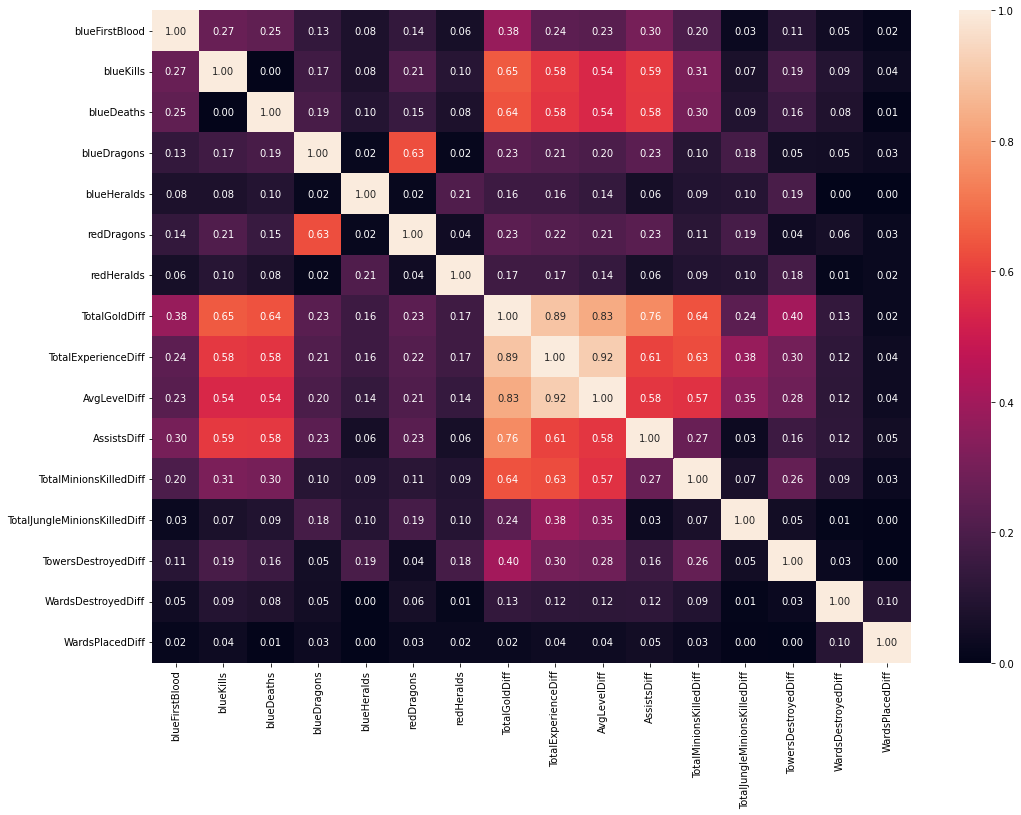

In [22]:
import seaborn as sns

plt.figure(figsize=(17, 12))
sns.heatmap(dataset.drop('blueWins', axis=1).corr().abs(), annot=True, fmt='.2f', vmin=0);

Andiamo ora a visualizzare le variabili di tipo numerico e la loro distribuzione, con l'obbiettivo di indivudare possibili **outliners**. Nel nostro caso possono essere partite che non vengono giocate al massimo delle proprie possibilità dai giocatori, come vederemo in seguito.

In [23]:
binary_cols = [cname for cname in dataset.drop("blueWins", axis=1).columns if dataset[cname].nunique() == 2]

numerical_cols = [cname for cname in dataset.columns if dataset[cname].nunique() > 2]

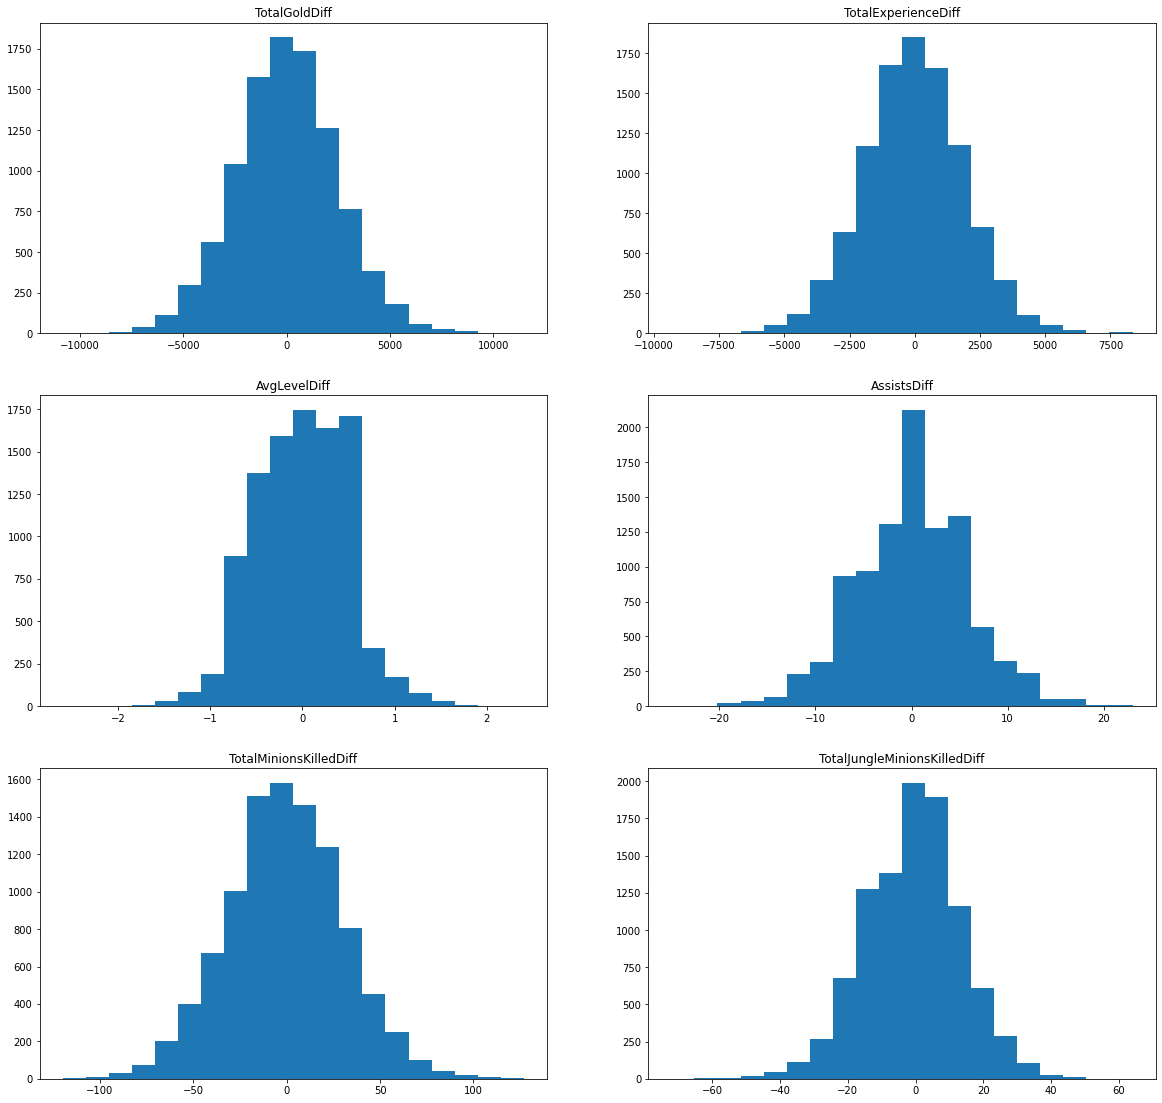

In [24]:
plt.figure(figsize=(20, 40))
to_plot = dataset.drop(binary_cols + ["blueWins", "TowersDestroyedDiff", "WardsDestroyedDiff", "WardsPlacedDiff", "blueKills", "blueDeaths"], axis=1)

for i, c in enumerate(to_plot):
  plt.subplot(6, 2, i+1)
  plt.title(c)
  plt.hist(dataset[c], bins=20)

Passiamo ad analizzare più nel dettaglio le feature più rilevanti ed a seguito cerchiamo di identificare gli **outsiders**

(array([3088., 4704., 1935.,  145.,    7.]),
 array([ 0. ,  4.4,  8.8, 13.2, 17.6, 22. ]),
 <a list of 5 Patch objects>)

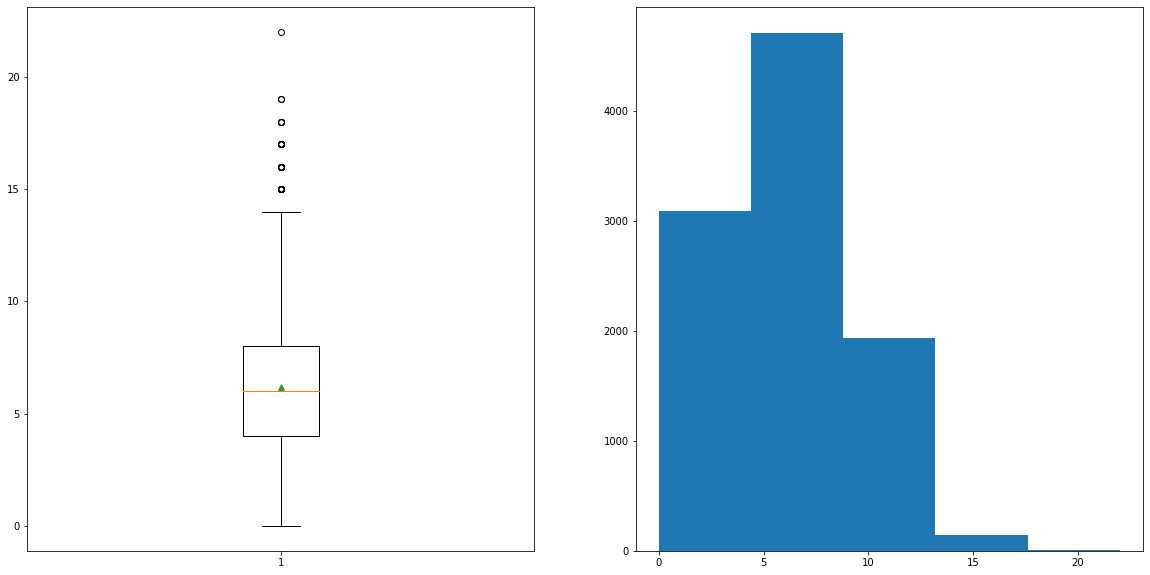

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].boxplot(dataset["blueKills"], showmeans=True)
axes[1].hist(dataset["blueKills"], bins=5)

(array([  11.,  202., 9195.,  453.,   18.]),
 array([-260. , -161.2,  -62.4,   36.4,  135.2,  234. ]),
 <a list of 5 Patch objects>)

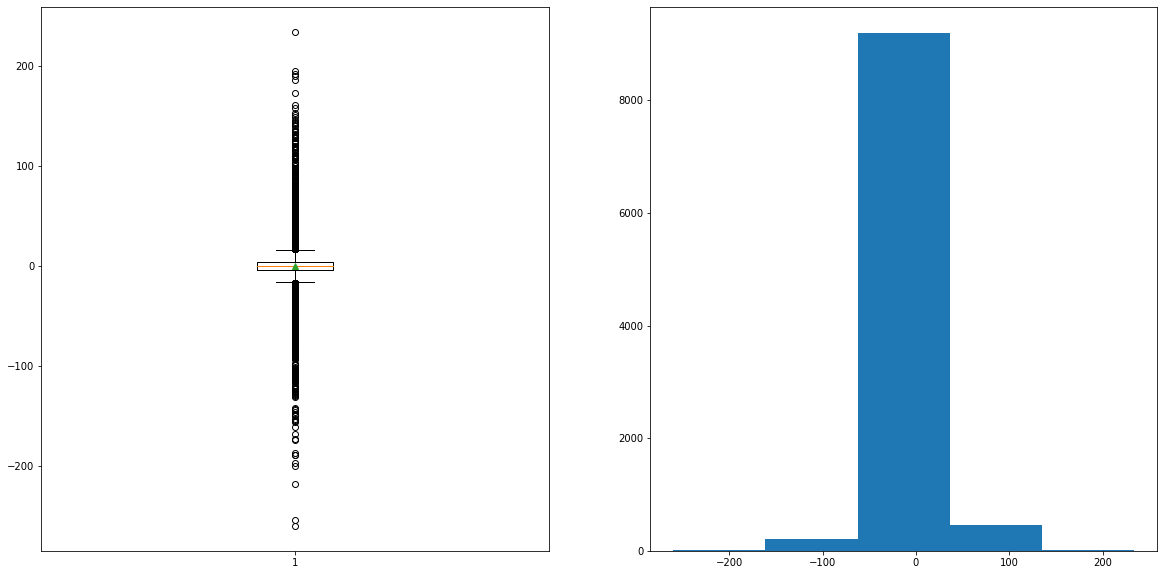

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].boxplot(dataset["WardsPlacedDiff"], showmeans=True)
axes[1].hist(dataset["WardsPlacedDiff"], bins=5)

(array([3.740e+02, 9.064e+03, 4.060e+02, 2.800e+01, 7.000e+00]),
 array([-2. , -0.8,  0.4,  1.6,  2.8,  4. ]),
 <a list of 5 Patch objects>)

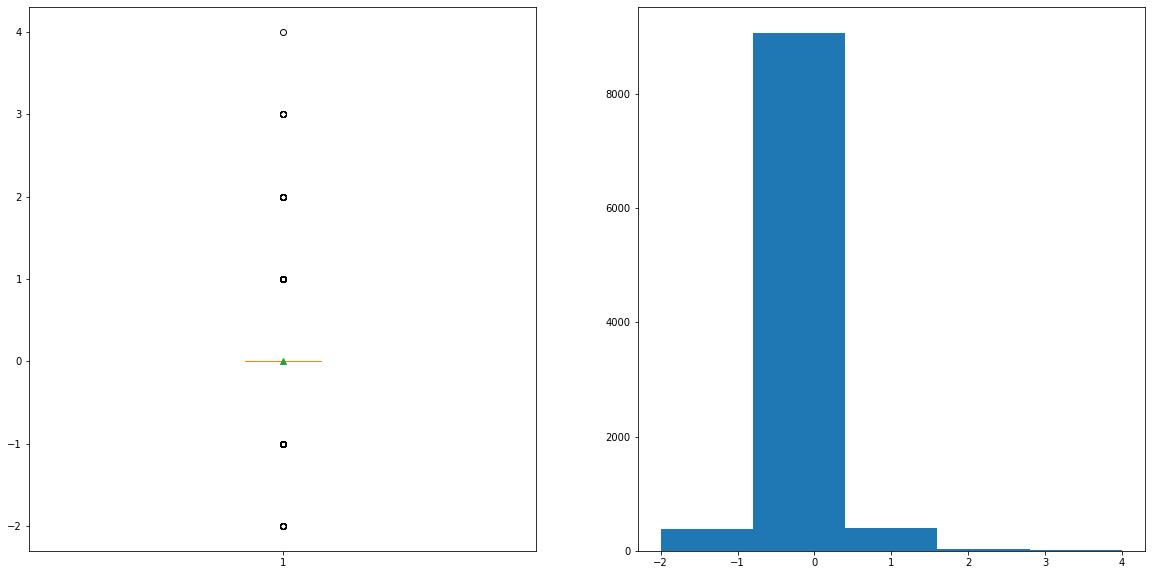

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].boxplot(dataset["TowersDestroyedDiff"], showmeans=True)
axes[1].hist(dataset["TowersDestroyedDiff"], bins=5)

Come notiamo dai grafici, ci sono partite con alcuni **outliners**, anche molto rilevanti. Andiamo ad analizzarli ed in caso eliminiamone una parte.

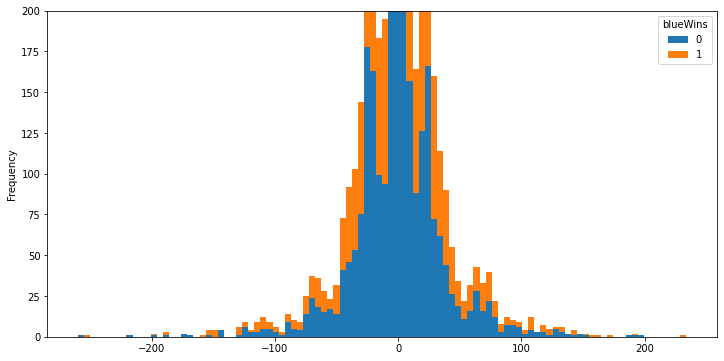

In [28]:
dataset.pivot(columns="blueWins")["WardsPlacedDiff"].plot.hist(bins=100, stacked=True, figsize=(12, 6), ylim=(0,200))

Possiamo notare come ci siano partite con più di 100 Wards di differenza tra le due squadre. A soli 10 minuti di gioco è una differenza molto alta e sicuramente non nello standard. Questo fattore è dovuto a partite in cui i giocatori smettono di giocare e posizionano Ward senza un motivo, in quanto non è possibile arrendersi prima dei 15 minuti di gioco.

In [30]:
dataset_1 = dataset.copy()
dataset = dataset.loc[dataset['WardsPlacedDiff'].abs() <= 100]

print("We've removed {} outliers".format(dataset_1.shape[0] - dataset.shape[0]))

We've removed 135 outliers


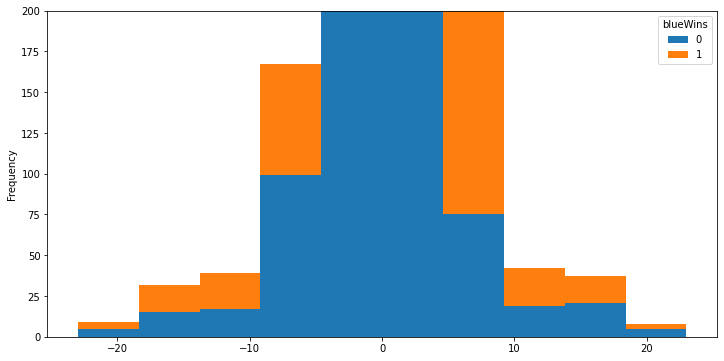

In [31]:
dataset.pivot(columns="blueWins")["WardsDestroyedDiff"].plot.hist(bins=10, stacked=True, figsize=(12, 6), ylim=(0,200))

Risulta difficle applicare lo stesso criterio su `WardsDestroyedDiff` in quanto le ward posizionate possono essere ignorate dai giocatori e non venire distrutte.

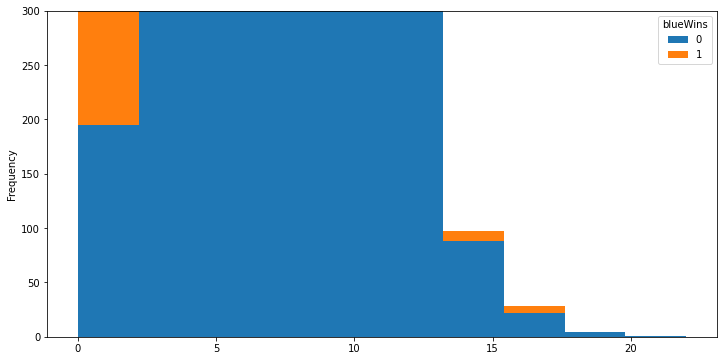

In [32]:
dataset.pivot(columns="blueWins")["blueDeaths"].plot.hist(bins=10, stacked=True, figsize=(12, 6), ylim=(0,300))

Notiamo come in alcune partite i morti totali di una squadra salgano anche al disopra delle 20 uccisioni. Arrivare a 20 uccisioni nei primi minuti non risulta impossibile, specialmente data la natura del gioco molto caotica.   
Risulta quindi difficile definire quando una partita è effettivamente al di fuori dello standard del gioco.

In [33]:
dataset['blueDeaths'].loc[dataset['blueDeaths'] >= 20]

7062    22
Name: blueDeaths, dtype: int64

- Visto la natura del gioco e il basso numero di partite al di sopra delle 20 uccisioni, decidiamo di mantenere queste entry.   
Stesso concetto viene applicato per `blueKills`

In [34]:
dataset['blueKills'].loc[dataset['blueKills'] >= 20]

9789    22
Name: blueKills, dtype: int64

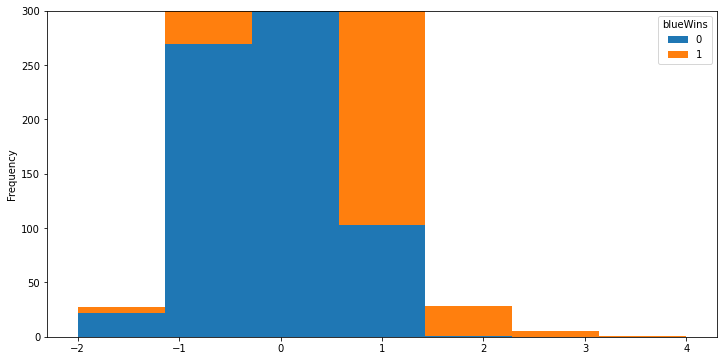

In [35]:
dataset.pivot(columns="blueWins")["TowersDestroyedDiff"].plot.hist(bins=7, stacked=True, figsize=(12, 6), ylim=(0,300))

Pensare di riuscire a distruggere più di 2 torri nei primi 10 minuti risulta molto difficile quando la partita rientra nello standard. Considerando anche che la media delle torri distrutte risulta 0.

- Decidiamo di eliminare tutte le partite con più di due torri distrutte

In [36]:
dataset_1 = dataset.copy()
dataset = dataset.loc[dataset['TowersDestroyedDiff'].abs() <= 2]

print("We've removed {} outliers".format(dataset_1.shape[0] - dataset.shape[0]))

We've removed 6 outliers


## Standardizazione e feature rilevanti

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [38]:
X = dataset.drop("blueWins", axis=1)
y = dataset["blueWins"]

In [39]:
def get_coefficients(model, index, model_name="model"):
    return pd.Series(model.named_steps[model_name].coef_[0], index=index)
    
def fit_and_eval(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    print("R-squared coefficient: {:.5}".format(model.score(X_val, y_val)))

Suddividiamo i dati in Training e Validation set per effettuare dei test su un semplice algoritmo Perceptron.

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=43, stratify=y.values)

In [41]:
model = Pipeline([
    ("model",  Perceptron(n_jobs=-1, random_state=42))
])
fit_and_eval(model, X_train, y_train, X_val, y_val)

R-squared coefficient: 0.74914


Andiamo a visualizzare quelle che risultano essere le feature più rilvenati per il modello attraverso i loro coefficenti

In [42]:
get_coefficients(model, X_train.columns)

blueFirstBlood                   422.0
blueKills                       -674.0
blueDeaths                      -847.0
blueDragons                     1967.0
blueHeralds                       -4.0
redDragons                     -1670.0
redHeralds                        97.0
TotalGoldDiff                   8452.0
TotalExperienceDiff             7244.0
AvgLevelDiff                      28.4
AssistsDiff                    -2502.0
TotalMinionsKilledDiff         -4813.0
TotalJungleMinionsKilledDiff    6637.0
TowersDestroyedDiff              -27.0
WardsDestroyedDiff             -1014.0
WardsPlacedDiff                  317.0
dtype: float64

Come potevamo aspettarci le feature più rilevanti risultano essere `TotalGoldDiff` e `TotalExperienceDiff`.

- Andiamo a **standardizzare** i valori delle varaibili numeriche per vedere se il modello migliora 

In [43]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train_test = X_train.copy()
X_val_test = X_val.copy()

X_train_test[numerical_cols] = scaler.transform(X_train_test[numerical_cols])
X_val_test[numerical_cols] = scaler.transform(X_val_test[numerical_cols])

my_cols = binary_cols + numerical_cols
X_train_test = X_train_test[my_cols].copy()
X_val_test = X_val_test[my_cols].copy()

In [44]:
X_train_test.head()

,blueFirstBlood,blueDragons,blueHeralds,redDragons,redHeralds,blueKills,blueDeaths,TotalGoldDiff,TotalExperienceDiff,AvgLevelDiff,AssistsDiff,TotalMinionsKilledDiff,TotalJungleMinionsKilledDiff,TowersDestroyedDiff,WardsDestroyedDiff,WardsPlacedDiff
4228,1,0,0,0,0,0.276097,-0.030953,0.584109,-0.120703,0.018707,0.855357,1.296293,-0.026716,-0.022671,-0.034752,-0.088637
8920,0,0,0,1,0,0.276097,-1.385517,0.830237,0.606793,0.865950,1.199540,-0.667748,-0.798902,-0.022671,-0.385155,0.153391
8905,0,0,0,1,0,-0.386186,0.307689,-0.691244,-0.705336,-0.404914,0.166991,-0.765950,-1.290293,-0.022671,-0.385155,0.250202
7228,1,1,0,0,1,0.276097,0.646330,-0.920554,-0.059552,0.442329,-1.209740,0.838017,-0.939299,-6.461301,-0.034752,-0.040231
9736,0,0,0,1,0,-1.379612,-0.369594,-0.671144,-0.012106,-0.404914,-0.865557,-1.191492,2.009046,-0.022671,-0.385155,-0.040231


In [45]:
std_model = Pipeline([
    ("model",  Perceptron())
])
fit_and_eval(std_model, X_train_test, y_train, X_val_test, y_val)

R-squared coefficient: 0.71013


In [46]:
get_coefficients(std_model, X_train.columns)

blueFirstBlood                 -2.000000e+00
blueKills                       2.000000e+00
blueDeaths                      0.000000e+00
blueDragons                     0.000000e+00
blueHeralds                    -1.000000e+00
redDragons                     -1.655709e+00
redHeralds                      6.772824e-01
TotalGoldDiff                   5.384872e+00
TotalExperienceDiff             5.548476e+00
AvgLevelDiff                    1.270863e+00
AssistsDiff                    -2.409280e+00
TotalMinionsKilledDiff          2.847860e+00
TotalJungleMinionsKilledDiff   -9.827818e-01
TowersDestroyedDiff            -8.881784e-16
WardsDestroyedDiff             -1.752014e+00
WardsPlacedDiff                -1.839410e+00
dtype: float64

Notiamo come la standardizazione delle variabili non abbia migliorato il modello, lo terremo da conto durante la modellazione.

- Proviamo ora ad aggiungere una **penalizzazione** di tipo **L1** per individuare le feature più rilevanti

In [47]:
std_pen_model = Pipeline([
    ("model",  Perceptron(penalty="l1", alpha=0.00001))
])
fit_and_eval(std_pen_model, X_train_test, y_train, X_val_test, y_val)

R-squared coefficient: 0.73409


In [48]:
get_coefficients(std_pen_model, X_train.columns)

blueFirstBlood                  0.000000
blueKills                       1.614400
blueDeaths                      0.000000
blueDragons                     1.614400
blueHeralds                     0.000000
redDragons                      1.201915
redHeralds                      0.000000
TotalGoldDiff                   3.324537
TotalExperienceDiff             3.329481
AvgLevelDiff                    1.445697
AssistsDiff                    -0.200872
TotalMinionsKilledDiff          0.000000
TotalJungleMinionsKilledDiff    0.000000
TowersDestroyedDiff             0.000000
WardsDestroyedDiff              0.000000
WardsPlacedDiff                 0.000000
dtype: float64

Già con `alpha` molto basso possiamo notare come molte feature siano già state azzerata dalla penalizzazione L1. In ogni caso le più importanti rimangono come ci aspettiamo `TotalGoldDiff` e `TotalExperienceDiff`.

- Andimao a vedere come si comporta il modello con **aplha** differenti

In [49]:
model_coeffs = []
i = 0

for alpha in np.logspace(-4, 0, 5):
    print("alpha {} :\n".format(alpha))
    model = Pipeline([
        ("model",  Perceptron(penalty="l1", alpha=alpha))
    ])
    fit_and_eval(model, X_train_test, y_train, X_val_test, y_val)
    model_coeffs.append(get_coefficients(model, X_train.columns))
    i += 1
    print("\n")

alpha 0.0001 :

R-squared coefficient: 0.69781


alpha 0.001 :

R-squared coefficient: 0.63142


alpha 0.01 :

R-squared coefficient: 0.73374


alpha 0.1 :

R-squared coefficient: 0.73374


alpha 1.0 :

R-squared coefficient: 0.50137




## Modellazione

### Perceptron

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

std_perceptron = Pipeline([
    ('scaler', StandardScaler()),
    ('perceptron', Perceptron(random_state=42))
])

parameters = {
    'scaler': [None, StandardScaler()],
    'perceptron__penalty': [None, 'l1', 'l2', 'elasticnet'],
    'perceptron__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'perceptron__l1_ratio': [0.2, 0.5, 0.7]
}

perceptron_cv = GridSearchCV(std_perceptron, parameters, cv=5, n_jobs=-1)
perceptron_cv.fit(X_train, y_train)
print('GridSearch on Perceptron finish')
print('Accuracy on train {:.2f}%'.format(perceptron_cv.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(perceptron_cv.score(X_val, y_val)*100))

GridSearch on Perceptron finish
Accuracy on train 71.92%
Accuracy on val 74.91%


In [51]:
from statsmodels.stats.proportion import proportion_confint
confidence = 95
    
l, u = proportion_confint(len(X_train) * perceptron_cv.score(X_val, y_val), len(X_train), 1-confidence/100, method='wilson')
print('Pmin =', l)
print('Pmax =', u)

Pmin = 0.7387145432694899
Pmax = 0.7592936254180738


In [52]:
perceptron_cv.best_params_

{'perceptron__alpha': 0.0001,
 'perceptron__l1_ratio': 0.2,
 'perceptron__penalty': None,
 'scaler': None}

In [53]:
pd.DataFrame(perceptron_cv.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_perceptron__alpha,param_perceptron__l1_ratio,param_perceptron__penalty,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014805,0.001563,0.003361,0.000199,0.0001,0.2,None,None,"{'perceptron__alpha': 0.0001, 'perceptron__l1_...",0.731672,0.707263,0.732942,0.705796,0.722671,0.720069,0.011617,1
40,0.013549,0.003097,0.003816,0.001730,0.001,0.7,None,None,"{'perceptron__alpha': 0.001, 'perceptron__l1_r...",0.731672,0.707263,0.732942,0.705796,0.722671,0.720069,0.011617,1
56,0.013686,0.001715,0.003187,0.000178,0.01,0.5,None,None,"{'perceptron__alpha': 0.01, 'perceptron__l1_ra...",0.731672,0.707263,0.732942,0.705796,0.722671,0.720069,0.011617,1
32,0.012086,0.001313,0.002895,0.000226,0.001,0.5,None,None,"{'perceptron__alpha': 0.001, 'perceptron__l1_r...",0.731672,0.707263,0.732942,0.705796,0.722671,0.720069,0.011617,1
64,0.014393,0.003455,0.002982,0.000110,0.01,0.7,None,None,"{'perceptron__alpha': 0.01, 'perceptron__l1_ra...",0.731672,0.707263,0.732942,0.705796,0.722671,0.720069,0.011617,1


In [54]:
perceptron_cv.best_score_

0.720068720241489

In [55]:
from sklearn.metrics import confusion_matrix
y_pred = perceptron_cv.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(cm, index=perceptron_cv.classes_, columns=perceptron_cv.classes_)

,0,1
0,1106,359
1,374,1083


In [56]:
pred = perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1465
           1       0.75      0.74      0.75      1457

    accuracy                           0.75      2922
   macro avg       0.75      0.75      0.75      2922
weighted avg       0.75      0.75      0.75      2922



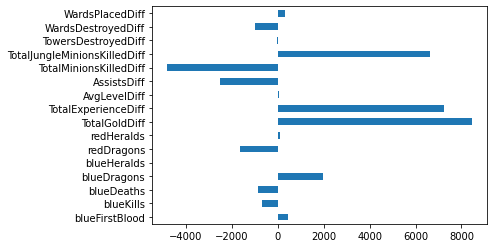

In [57]:
pc_imp = pd.Series(perceptron_cv.best_estimator_[1].coef_[0], index=X_train.columns)
pc_imp.plot(kind='barh')

Il modello senza standardizzazione dei dati mette in evidenza le solite variabili che ci aspettiamo `Gold` `Experience`, ma mette in risalto anche la variabile `TotalJunglMinionsKilled`.

In [58]:
from sklearn.metrics import mean_squared_error

perc_mse = mean_squared_error(y_val, perceptron_cv.predict(X_val))
perc_mse

0.25085557837097877

### Perceptron with Polynomial features

In [59]:
from sklearn.preprocessing import PolynomialFeatures

std_perceptron = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('perceptron', Perceptron(random_state=42))
])

parameters = {
    'scaler': [None, StandardScaler()],
    'perceptron__penalty': ['l1', 'l2', 'elasticnet'],
    'perceptron__alpha': [0.001, 0.01, 0.1],
    'perceptron__l1_ratio': [0.2, 0.5, 0.7]
}

pol_perceptron_cv = GridSearchCV(std_perceptron, parameters, cv=5, n_jobs=-1)
pol_perceptron_cv.fit(X_train, y_train)
print('GridSearch on Perceptron finish')
print('Accuracy on train {:.2f}%'.format(pol_perceptron_cv.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(pol_perceptron_cv.score(X_val, y_val)*100))

GridSearch on Perceptron finish
Accuracy on train 71.80%
Accuracy on val 74.81%


In [60]:
confidence = 95
    
l, u = proportion_confint(len(X_train) * pol_perceptron_cv.score(X_val, y_val), len(X_train), 1-confidence/100, method='wilson')
print('Pmin =', l)
print('Pmax =', u)

Pmin = 0.7376744708222102
Pmax = 0.7582814664009817


In [61]:
pol_perceptron_cv.best_params_

{'perceptron__alpha': 0.01,
 'perceptron__l1_ratio': 0.2,
 'perceptron__penalty': 'l2',
 'scaler': None}

In [62]:
pd.DataFrame(pol_perceptron_cv.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_perceptron__alpha,param_perceptron__l1_ratio,param_perceptron__penalty,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,0.257175,0.091293,0.015844,0.001202,0.01,0.5,l2,None,"{'perceptron__alpha': 0.01, 'perceptron__l1_ra...",0.728006,0.702861,0.723404,0.711665,0.720470,0.717281,0.008968,1
32,0.244390,0.081685,0.015406,0.001966,0.01,0.7,l2,None,"{'perceptron__alpha': 0.01, 'perceptron__l1_ra...",0.728006,0.702861,0.723404,0.711665,0.720470,0.717281,0.008968,1
20,0.251005,0.089715,0.016474,0.002849,0.01,0.2,l2,None,"{'perceptron__alpha': 0.01, 'perceptron__l1_ra...",0.728006,0.702861,0.723404,0.711665,0.720470,0.717281,0.008968,1
34,0.571221,0.062463,0.013888,0.000418,0.01,0.7,elasticnet,None,"{'perceptron__alpha': 0.01, 'perceptron__l1_ra...",0.707478,0.703595,0.732942,0.713866,0.719736,0.715523,0.010305,4
50,0.201341,0.013971,0.015670,0.001286,0.1,0.7,l2,None,"{'perceptron__alpha': 0.1, 'perceptron__l1_rat...",0.733138,0.702861,0.731475,0.707997,0.683786,0.711851,0.018556,5


In [63]:
pol_perceptron_cv.best_score_

0.7172812904086424

In [64]:
from sklearn.metrics import confusion_matrix
y_pred = pol_perceptron_cv.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(cm, index=pol_perceptron_cv.classes_, columns=pol_perceptron_cv.classes_)

,0,1
0,1102,363
1,373,1084


In [65]:
pred = pol_perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1465
           1       0.75      0.74      0.75      1457

    accuracy                           0.75      2922
   macro avg       0.75      0.75      0.75      2922
weighted avg       0.75      0.75      0.75      2922



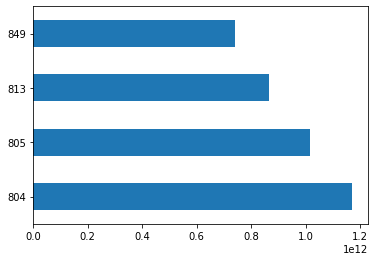

In [66]:
pc_imp = pd.Series(pol_perceptron_cv.best_estimator_[2].coef_[0])
pc_imp.nlargest(4).plot(kind='barh')

L'introduzione di features polinomiali sembra non aver migliorato il modello precedente, osserviamo che le features rilevanti per il modello sono una combinazione delle features orginali, non producendo di fatto un risultato utile ai fini della valutazione semantica del modello.

In [67]:
pol_perc_mse = mean_squared_error(y_val, pol_perceptron_cv.predict(X_val))
pol_perc_mse

0.2518822724161533

### Logistc Regression

In [68]:
from sklearn.linear_model import LogisticRegression

std_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(dual=False, solver="saga", random_state=42))
])

parameters = {
    'scaler': [None, StandardScaler()],
    'lr__penalty': ['l1', 'l2', 'elasticnet'],
    'lr__C': [1, 0.8, 0.3, 0.1],
    'lr__l1_ratio': [0.2, 0.5, 0.7]
}

lr = GridSearchCV(std_lr, parameters, cv=5, n_jobs=-1, return_train_score=True, scoring='f1')
lr.fit(X_train, y_train)
print("Grid search finish")
print('Accuracy on train {:.2f}%'.format(lr.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(lr.score(X_val, y_val)*100))

Grid search finish
Accuracy on train 72.66%
Accuracy on val 74.52%


In [69]:
confidence = 95
    
l, u = proportion_confint(len(X_train) * lr.score(X_val, y_val), len(X_train), 1-confidence/100, method='wilson')
print('Pmin =', l)
print('Pmax =', u)

Pmin = 0.7347535426909699
Pmax = 0.755438125681976


In [70]:
lr.best_params_

{'lr__C': 1,
 'lr__l1_ratio': 0.2,
 'lr__penalty': 'elasticnet',
 'scaler': StandardScaler()}

In [71]:
pd.DataFrame(lr.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__l1_ratio,param_lr__penalty,param_scaler,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.092115,0.008731,0.004716,0.000272,1,0.2,elasticnet,StandardScaler(),"{'lr__C': 1, 'lr__l1_ratio': 0.2, 'lr__penalty...",0.743719,...,0.725012,0.015201,1,0.723145,0.728109,0.723796,0.730875,0.722550,0.725695,0.003245
3,0.163251,0.019832,0.007341,0.003535,1,0.2,l2,StandardScaler(),"{'lr__C': 1, 'lr__l1_ratio': 0.2, 'lr__penalty...",0.743719,...,0.724824,0.015109,2,0.722909,0.728109,0.723193,0.731009,0.722785,0.725601,0.003362
15,0.073240,0.005211,0.004878,0.000519,1,0.7,l2,StandardScaler(),"{'lr__C': 1, 'lr__l1_ratio': 0.7, 'lr__penalty...",0.743719,...,0.724824,0.015109,2,0.722909,0.728109,0.723193,0.731009,0.722785,0.725601,0.003362
9,0.070618,0.008405,0.004745,0.000460,1,0.5,l2,StandardScaler(),"{'lr__C': 1, 'lr__l1_ratio': 0.5, 'lr__penalty...",0.743719,...,0.724824,0.015109,2,0.722909,0.728109,0.723193,0.731009,0.722785,0.725601,0.003362
11,0.093552,0.003534,0.004745,0.000430,1,0.5,elasticnet,StandardScaler(),"{'lr__C': 1, 'lr__l1_ratio': 0.5, 'lr__penalty...",0.743719,...,0.724747,0.015106,5,0.723279,0.727975,0.723428,0.730776,0.722816,0.725655,0.003171


In [72]:
lr.best_score_

0.7250119939397317

In [73]:
y_pred = lr.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(cm, index=lr.classes_, columns=lr.classes_)

,0,1
0,1112,353
1,382,1075


In [74]:
pred = lr.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1465
           1       0.75      0.74      0.75      1457

    accuracy                           0.75      2922
   macro avg       0.75      0.75      0.75      2922
weighted avg       0.75      0.75      0.75      2922



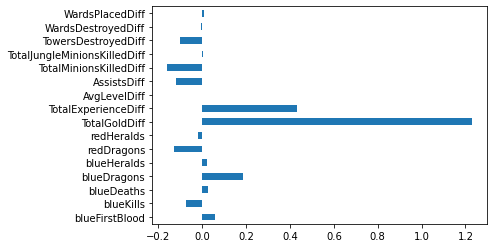

In [75]:
pc_imp = pd.Series(lr.best_estimator_[1].coef_[0], index=X_train.columns)
pc_imp.plot(kind='barh')

Il modello ha evidenziato le stesse feature rilevanti che ci siamo aspettati da Perceptron. Vediamo "sparire" la variabile `TotalJungleMinionKilled` tra le migliori feature. Vediamo spuntare per la prima volta `blueDragons` a seguito delle altre. Questo risulta accettabile in quanto accumulare draghi può risultare in una **win condition** all'interno del gioco.

In [76]:
lr_mse = mean_squared_error(y_val, lr.predict(X_val))
lr_mse

0.2515400410677618

### Random Forrest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc_model = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RandomForestClassifier(n_jobs=-1, random_state=42))
])

parameters = {
    'scaler': [None, StandardScaler()],
    'rfc__n_estimators': [100, 200, 300],
    'rfc__max_depth': [2, 4, 6, 8, 10],
}
    

rfc = GridSearchCV(rfc_model, parameters, cv=5, n_jobs=-1, return_train_score=True, scoring='f1')
rfc.fit(X_train, y_train)

print('Random Forest GridSearch finish')
print('Accuracy on train {:.2f}%'.format(rfc.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(rfc.score(X_val, y_val)*100))

Random Forest GridSearch finish
Accuracy on train 74.37%
Accuracy on val 73.55%


In [78]:
confidence = 95
    
l, u = proportion_confint(len(X_train) * rfc.score(X_val, y_val), len(X_train), 1-confidence/100, method='wilson')
print('Pmin =', l)
print('Pmax =', u)

Pmin = 0.7248683496226194
Pmax = 0.7458068525085257


In [79]:
rfc.best_params_

{'rfc__max_depth': 6, 'rfc__n_estimators': 200, 'scaler': None}

In [80]:
pd.DataFrame(rfc.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__max_depth,param_rfc__n_estimators,param_scaler,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
14,1.619731,0.029036,0.097578,0.002381,6,200,None,"{'rfc__max_depth': 6, 'rfc__n_estimators': 200...",0.731672,0.719183,...,0.717697,0.012512,1,0.744334,0.749349,0.744936,0.749248,0.744799,0.746533,0.002267
15,2.163510,0.691432,0.121464,0.030259,6,200,StandardScaler(),"{'rfc__max_depth': 6, 'rfc__n_estimators': 200...",0.731672,0.719183,...,0.717697,0.012512,1,0.744569,0.749349,0.745076,0.749107,0.744799,0.746580,0.002169
17,2.865912,0.374618,0.175294,0.036106,6,300,StandardScaler(),"{'rfc__max_depth': 6, 'rfc__n_estimators': 300...",0.735683,0.719477,...,0.717013,0.015283,3,0.745260,0.750279,0.742986,0.748353,0.744602,0.746296,0.002646
16,2.497529,0.111974,0.168204,0.023218,6,300,None,"{'rfc__max_depth': 6, 'rfc__n_estimators': 300...",0.735683,0.719477,...,0.716930,0.015023,4,0.745120,0.750279,0.742707,0.748353,0.744602,0.746212,0.002728
19,1.821619,0.101838,0.073798,0.018758,8,100,StandardScaler(),"{'rfc__max_depth': 8, 'rfc__n_estimators': 100...",0.737455,0.715424,...,0.716170,0.016179,5,0.793942,0.797770,0.790802,0.794829,0.789366,0.793342,0.002981


In [81]:
rfc.best_score_

0.717696688144015

In [82]:
y_pred = rfc.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(cm, index=rfc.classes_, columns=rfc.classes_)

,0,1
0,1127,338
1,413,1044


In [83]:
pred = rfc.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1465
           1       0.76      0.72      0.74      1457

    accuracy                           0.74      2922
   macro avg       0.74      0.74      0.74      2922
weighted avg       0.74      0.74      0.74      2922



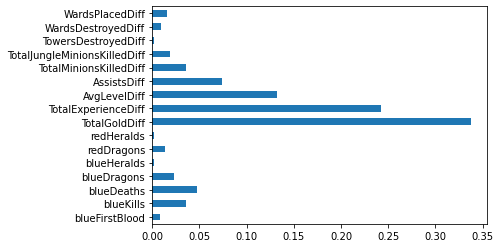

In [84]:
pc_imp = pd.Series(rfc.best_estimator_[1].feature_importances_, index=X_train.columns)
pc_imp.plot(kind='barh')

Il modello mantiene le sue feature primare come gli altri. Vediamo dare più valore alle feature che rappresentano la differenza di valori tra le due squadre come `AssistsDiff` e `AvgLevelDiff`.

In [85]:
rfc_mse = mean_squared_error(y_val, rfc.predict(X_val))
rfc_mse

0.25701574264202603

### XGBoost

In [86]:
from xgboost import XGBClassifier

std_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(nthread=8, objective='binary:logistic', random_state=42))
])

parameters = {
    'scaler': [None, StandardScaler()],
    'xgb__eta': [0.002, 0.1, 0.5],
    'xgb__n_estimators': [150, 300],
    'xgb__alpha': [0.0001, 0.001]
}

xgb = GridSearchCV(std_xgb, parameters, cv=3, n_jobs=-1, return_train_score=True, scoring='accuracy')
xgb.fit(X_train, y_train)
print("Grid Search Xgboost finish")
print('Accuracy on train {:.2f}%'.format(xgb.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(xgb.score(X_val, y_val)*100))

Grid Search Xgboost finish
Accuracy on train 74.78%
Accuracy on val 74.16%


In [87]:
confidence = 95
    
l, u = proportion_confint(len(X_train) * xgb.score(X_val, y_val), len(X_train), 1-confidence/100, method='wilson')
print('Pmin =', l)
print('Pmax =', u)

Pmin = 0.7310891068353239
Pmax = 0.7518693644468465


In [88]:
xgb.best_params_

{'scaler': None,
 'xgb__alpha': 0.0001,
 'xgb__eta': 0.002,
 'xgb__n_estimators': 150}

In [89]:
pd.DataFrame(xgb.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_xgb__alpha,param_xgb__eta,param_xgb__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.375537,0.095538,0.020809,0.006385,None,0.0001,0.002,150,"{'scaler': None, 'xgb__alpha': 0.0001, 'xgb__e...",0.722271,0.721831,0.713468,0.71919,0.00405,1,0.751981,0.759023,0.759023,0.756675,0.00332
20,1.590262,0.304881,0.034670,0.022237,StandardScaler(),0.001,0.1,150,"{'scaler': StandardScaler(), 'xgb__alpha': 0.0...",0.722271,0.721831,0.713468,0.71919,0.00405,1,0.751981,0.759023,0.759023,0.756675,0.00332
2,1.279762,0.061912,0.033044,0.013008,None,0.0001,0.1,150,"{'scaler': None, 'xgb__alpha': 0.0001, 'xgb__e...",0.722271,0.721831,0.713468,0.71919,0.00405,1,0.751981,0.759023,0.759023,0.756675,0.00332
18,1.172136,0.010914,0.020766,0.000595,StandardScaler(),0.001,0.002,150,"{'scaler': StandardScaler(), 'xgb__alpha': 0.0...",0.722271,0.721831,0.713468,0.71919,0.00405,1,0.751981,0.759023,0.759023,0.756675,0.00332
4,1.163066,0.019880,0.018750,0.000568,None,0.0001,0.5,150,"{'scaler': None, 'xgb__alpha': 0.0001, 'xgb__e...",0.722271,0.721831,0.713468,0.71919,0.00405,1,0.751981,0.759023,0.759023,0.756675,0.00332


In [90]:
xgb.best_score_

0.7191901408450705

In [91]:
y_pred = xgb.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(cm, index=xgb.classes_, columns=xgb.classes_)

,0,1
0,1130,335
1,420,1037


In [92]:
pred = xgb.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1465
           1       0.76      0.71      0.73      1457

    accuracy                           0.74      2922
   macro avg       0.74      0.74      0.74      2922
weighted avg       0.74      0.74      0.74      2922



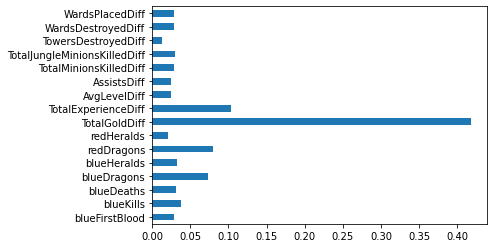

In [93]:
pc_imp = pd.Series(xgb.best_estimator_[1].feature_importances_, index=X_train.columns)
pc_imp.plot(kind='barh')

Il modello in questione oltre alle solite feature, mette in risalto le variabili categoriche `Dragons`. Come abbiamo precedentemente visto con Logistic Regression

In [94]:
xgb_mse = mean_squared_error(y_val, xgb.predict(X_val))
xgb_mse

0.25838466803559207

## Model comparison

Andiamo a confrontare l'accuratezza dei modelli e vediamo se è statisticamente significativa.

In [95]:
def model_comparison(mse_1, mse_2):
    d = np.abs(mse_1 - mse_2)
    variance = (mse_1 * (1 - mse_1)) / len(X_val) + (mse_2 * (1 - mse_2)) / len(X_val)
    d_min = d - 1.96 * np.sqrt(variance)
    d_max = d + 1.96 * np.sqrt(variance)
    return (d_min, d_max)

In [96]:
model_comparison(xgb_mse, perc_mse)

(-0.014809201221959108, 0.029867380551185704)

In [97]:
model_comparison(xgb_mse, lr_mse)

(-0.01550368439990063, 0.02919293833556119)

In [98]:
model_comparison(xgb_mse, rfc_mse)

(-0.021058399994496015, 0.023796250781628083)

In [99]:
model_comparison(rfc_mse, perc_mse)

(-0.016158596504786547, 0.028478925046881074)

In [100]:
model_comparison(rfc_mse, lr_mse)

(-0.016853088447248893, 0.027804491595777386)

In [101]:
model_comparison(perc_mse, lr_mse)

(-0.021554898343856974, 0.022923823737423007)

Come abbiamo visto durante la modellazione abbiamo incontrato una netta similiratà tra i modelli, senza nessun "outsider". Tramite il loro confronto possiamo affermare che non ci siano accuratezze statisticamente significative.
I modelli ad albero hanno ottenuto valori di `F1-score` `precision` e `recall` livemente inferirori rispetto alle controparti e con valori sbilanciati tra vittorie e sconfitte.

### Confronto con modello casuale

Effettuiamo un semplice test per mostrare come i modelli utilizzati qui sopra non siano statisticamente equivalenti con un modello casuale.

In [102]:
from sklearn.dummy import DummyClassifier

In [103]:
random = DummyClassifier(strategy="uniform", random_state=42)
random.fit(X_train, y_train)

random_score = random.score(X_val, y_val)
random_score

0.48836413415468855

In [104]:
random_mse = mean_squared_error(y_val, random.predict(X_val))
random_mse

0.5116358658453114

In [105]:
def model_comparison_99(mse_1, mse_2):
    d = np.abs(mse_1 - mse_2)
    variance = (mse_1 * (1 - mse_1)) / len(X_val) + (mse_2 * (1 - mse_2)) / len(X_val)
    d_min = d - 2.58 * np.sqrt(variance)
    d_max = d + 2.58 * np.sqrt(variance)
    return (d_min, d_max)

In [106]:
model_comparison_99(random_mse, perc_mse)

(0.2292001988817306, 0.29236037606693466)

In [107]:
model_comparison_99(random_mse, lr_mse)

(0.22850345428948549, 0.29168819526561374)

In [108]:
model_comparison_99(random_mse, rfc_mse)

(0.22293088129579194, 0.28630936511077876)

In [109]:
model_comparison_99(random_mse, xgb_mse)

(0.2215381208076493, 0.2849642748117893)